# Optimized Model
This model does not show under- or overfitting and performs well on both, training and testing data. Afterwards, a brief description on how to tackle the challenges of an optimal model complexity. 

To address underfitting, one approach is to increase the complexity of the model by adding more layers or increasing the number of filters in each layer. To address overfitting, we can try several approaches. One approach is to simplify the model by removing some layers or decreasing the number of filters in each layer. Another approach is to use less epochs for example.




Adding dropout or weight decay can help to address both of the above mentioned issues. We can also try adjusting the hyperparameters such as learning rate, batch size, or number of epochs.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

Found 2666 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


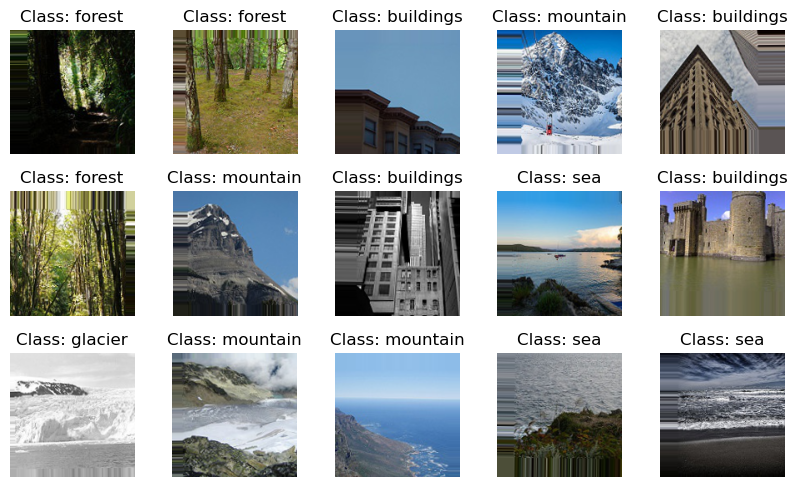

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 150
batch_size = 32

# TODO: add data augmentation for omptimized model
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.005,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    './dataset/seg_train/seg_train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse'
)
test_generator = test_datagen.flow_from_directory(
    './dataset/seg_test/seg_test',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='sparse'
)
labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea']


samples = train_generator.__next__() 
images = samples[0]
target = samples[1]

plt.figure(figsize = (10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')

## Building the Model
Here we use the same model as the overfitting one but we add some extras to reduce the overfitting behavior.


**Regularization**: reduce the impact impact of the weights. The weights then end up having less impact on the loss function which determines the error between the actual label and predicted label. This reduces complexity of the model and therefore reduces overfitting. We are adding regularization only to those layers which have the largest number of parameters according to the model summary.

Dropout Layers: The benefit of using dropout is no node in the network will be assigned with high parameter values, as a a result the parameter values will be dispersed and the output of the current layer will not depend on a single node.
E.g. Dropout(0.2) drops the input layers at a probability of 0.2.

To **improve generalization** of the model, data augmentation is a useful tool. With data augmentation we can add artificial effects to the images such as shearing, stretching, flipping, rotating and translating. Through these effects, the images always appear differently each time they appear in the training step and therefore the CNN doesn't adapt to the exact images but rather learns about the relative features inside of an image.

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same', kernel_regularizer=l2(l=0.0001))) 
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(Conv2D(1024, (3,3), activation = 'relu', padding = 'same', kernel_regularizer=l2(l=0.001))) 
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same', kernel_regularizer=l2(l=0.001))) 
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 18, 18, 128)     

## Training the Model

In [28]:
history = model.fit(train_generator, validation_data=test_generator, epochs=20) 

Epoch 1/20
84/84 [==============================] - 103s 1s/step - loss: 1.9049 - accuracy: 0.2427 - val_loss: 1.6389 - val_accuracy: 0.2185
Epoch 2/20
84/84 [==============================] - 104s 1s/step - loss: 1.2831 - accuracy: 0.4771 - val_loss: 1.1710 - val_accuracy: 0.5166
Epoch 3/20
84/84 [==============================] - 102s 1s/step - loss: 1.1166 - accuracy: 0.5416 - val_loss: 1.0446 - val_accuracy: 0.5674
Epoch 4/20
84/84 [==============================] - 103s 1s/step - loss: 1.0358 - accuracy: 0.5750 - val_loss: 1.1101 - val_accuracy: 0.5554
Epoch 5/20
84/84 [==============================] - 103s 1s/step - loss: 0.9611 - accuracy: 0.6249 - val_loss: 0.9900 - val_accuracy: 0.5714
Epoch 6/20
84/84 [==============================] - 102s 1s/step - loss: 0.8924 - accuracy: 0.6489 - val_loss: 0.8405 - val_accuracy: 0.6755
Epoch 7/20
84/84 [==============================] - 102s 1s/step - loss: 0.8536 - accuracy: 0.6733 - val_loss: 0.8021 - val_accuracy: 0.6975
Epoch 8/20
84

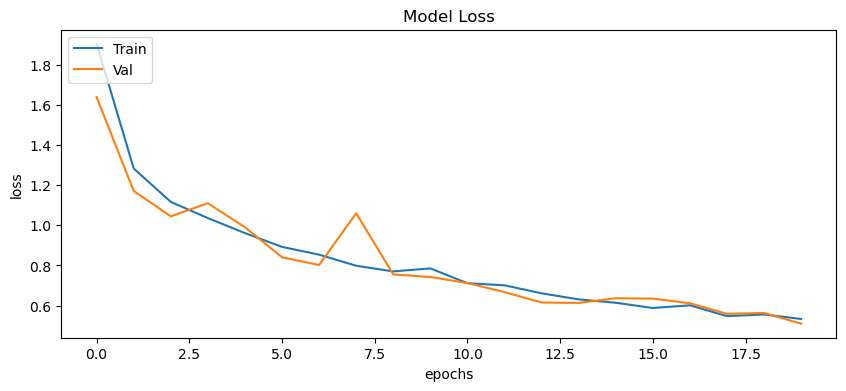

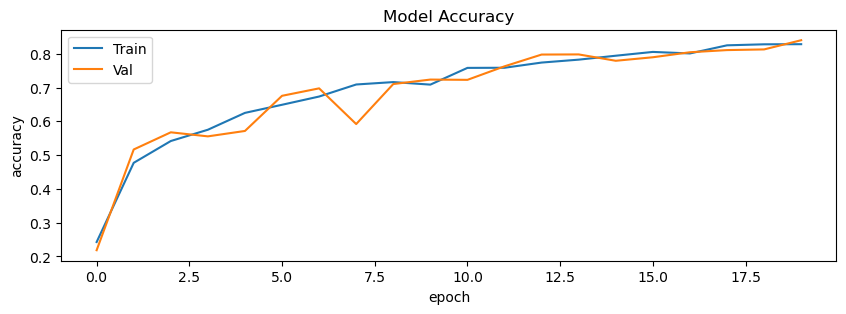

In [29]:
%run rueegg_wissiak_model_visualization.ipynb

In [30]:
%run rueegg_wissiak_model_evaluation.ipynb

79/79 [==============================] - 13s 169ms/step
Predicted classes: [3 3 0 ... 1 3 4]
True labels: [0 0 0 ... 4 4 4]
Accuracy:
 0.1880752300920368
